# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
#WeatherPy Analysis
#Point 1: Per Relationship Between Latitude and Temperature chart, the nearer to 0 degrees Latitude,
#the higher or warmer the temperature, but only in the northern hemisphere. 
#Temperatures in the southern hemisphere area generally warmed at the time the data was collected 
#irrespective of latitude, likely due to the fact it is summer there.

#Point 2: Per the Relationship Between Latitude and Humidity chart, a) there is an outlier of data and b) 
#the further from the equator, Lat 0 degree, the less humid the city. Again, this is likely because it is 
#winter in the northern hemisphere (the time the data was collected) and there is generally less humidity
#in the winter months.

#Point 3: More cloud cover above the equator at the time this data was collected. The further from the 
#equator the city, the more cloud cover reported during the winter months. Cities having their summer
#reported less clouds in general.

#Point 4: Per the final chart, Relationship Between Latitude and Humidity, there is a mostly positive
#correlation between wind speed and distance from equator. The further from the equator (in absolute terms)
#the higher the wind speed. A handful of cities reported wind speeds in excess of 40 mph. 

In [ ]:
# # Unit 6 | Assignment - What's the Weather Like?

# ## Background

# Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

# Now, we know what you may be thinking: _"Duh. It gets hotter..."_

# But, if pressed, how would you **prove** it?

# ![Equator](Images/equatorsign.png)

# ## WeatherPy

# In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

# Your objective is to build a series of scatter plots to showcase the following relationships:

# * Temperature (F) vs. Latitude
# * Humidity (%) vs. Latitude
# * Cloudiness (%) vs. Latitude
# * Wind Speed (mph) vs. Latitude

# Your final notebook must:

# * Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
# * Perform a weather check on each of the cities using a series of successive API calls.
# * Include a print log of each city as it's being processed with the city number and city name.
# * Save both a CSV of all data retrieved and png images for each scatter plot.

# As final considerations:

# * You must complete your analysis using a Jupyter notebook.
# * You must use the Matplotlib or Pandas plotting libraries.
# * You must include a written description of three observable trends based on the data.
# * You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
# * See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format.

# ## Hints and Considerations

# * The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

# * You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

# * Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

# * A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

# * Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

# * In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

# * Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!

# ## Copyright

# Data Boot Camp © 2018. All Rights Reserved.



In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv" 

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    city = city.replace(" ", "%20")
    
    # Add if the city is unique
    if city not in cities:
        
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

In [4]:
# Dependencies
import json
import requests
from config import api_key

In [5]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"

# Build query URL
query_url = url + "appid=" + api_key + "&q=" + city

In [6]:
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

The weather API responded with: {'coord': {'lon': -0.13, 'lat': 51.51}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 281.54, 'pressure': 1033, 'humidity': 70, 'temp_min': 278.71, 'temp_max': 284.26}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 90}, 'clouds': {'all': 75}, 'dt': 1553369317, 'sys': {'type': 1, 'id': 1414, 'message': 0.0076, 'country': 'GB', 'sunrise': 1553320634, 'sunset': 1553365026}, 'id': 2643743, 'name': 'London', 'cod': 200}.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#Below is code which should work. However OpenWeatherMap sent me the following email:

# Dear Customer,
# Your OpenWeatherMap API key b13f6625c6d1fa30e0a7142197e7ab10 is 
#temporary blocked due to the continual sufficient exceeding of 
#the calls per minute limit by 
#performing 617 requests within a minute but the limit for the Free account is 60 rpm.

#I assume this means i've exceeded an artibary limit of API requests. 

In [10]:
# # OpenWeatherMap API Key
# api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [11]:
# Your objective is to build a series of scatter plots to showcase the following relationships:



# * Temperature (F) vs. Latitude
# * Humidity (%) vs. Latitude
# * Cloudiness (%) vs. Latitude
# * Wind Speed (mph) vs. Latitude

#Create lists to answer the questions
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#City record counter
record = 1

#print the city log as it is processed
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record = record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(2.00)
        
    # If no record found "skip" to next call
    except:
        print("Missing city data. Skip...")
    continue

Beginning Data Retrieval
-------------------------------
Missing city data. Skip...
Processing Record 1 | Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=bluff
Processing Record 2 | Namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=namibe
Processing Record 3 | Hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=hilo
Processing Record 4 | Katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=katsuura
Processing Record 5 | Upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=upernavik
Processing Record 6 | Mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=mataura
Processing Record 7 | Codrington
http://api.openweathermap.org/data/2.5/weat

Processing Record 56 | Yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=yulara
Processing Record 57 | Yeppoon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=yeppoon
Missing city data. Skip...
Missing city data. Skip...
Missing city data. Skip...
Processing Record 58 | Zhob
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=zhob
Processing Record 59 | Praia da Vitoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=praia%20da%20vitoria
Processing Record 60 | Linhares
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=linhares
Processing Record 61 | San Jose
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=san%20jose
Processing Record 62 | Jalu
http://api.openweat

Processing Record 110 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=hobart
Processing Record 111 | Yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=yellowknife
Processing Record 112 | Chifeng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=chifeng
Processing Record 113 | Goma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=goma
Processing Record 114 | Atikokan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=atikokan
Processing Record 115 | Hefei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=hefei
Processing Record 116 | Cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=cayenne
P

Processing Record 166 | Vredendal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=vredendal
Processing Record 167 | Palana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=palana
Processing Record 168 | Torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=torbay
Processing Record 169 | Kalat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=kalat
Processing Record 170 | Roela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=roela
Processing Record 171 | Llanes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=llanes
Processing Record 172 | Chima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=chima
Processing Re

Processing Record 222 | Lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=lata
Processing Record 223 | Teguise
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=teguise
Processing Record 224 | Zhanaozen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=zhanaozen
Missing city data. Skip...
Missing city data. Skip...
Processing Record 225 | Shihezi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=shihezi
Missing city data. Skip...
Processing Record 226 | Nefteyugansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=nefteyugansk
Processing Record 227 | Leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=leningradskiy
Processing Record 228 | Churapcha
http://

Processing Record 276 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=norman%20wells
Processing Record 277 | Buala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=buala
Processing Record 278 | Nantucket
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=nantucket
Processing Record 279 | Tuburan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=tuburan
Processing Record 280 | Aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=aklavik
Processing Record 281 | Alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=alofi
Processing Record 282 | Moree
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=m

Processing Record 332 | Alyangula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=alyangula
Processing Record 333 | Timberlake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=timberlake
Processing Record 334 | Boden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=boden
Processing Record 335 | Sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=sale
Processing Record 336 | Pandan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=pandan
Processing Record 337 | Kendari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=kendari
Processing Record 338 | Lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=lavren

Missing city data. Skip...
Processing Record 389 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=longyearbyen
Processing Record 390 | Yerbogachen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=yerbogachen
Processing Record 391 | Tuy Hoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=tuy%20hoa
Processing Record 392 | Port Moresby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=port%20moresby
Processing Record 393 | Pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=pevek
Processing Record 394 | Mount Pleasant
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=mount%20pleasant
Processing Record 395 | Nemuro
http://api.openweathermap.org/data/2.5/w

Processing Record 445 | Sulangan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=sulangan
Processing Record 446 | Luanda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=luanda
Missing city data. Skip...
Processing Record 447 | Porto Belo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=porto%20belo
Processing Record 448 | Freeport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=freeport
Processing Record 449 | Saint George
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=saint%20george
Processing Record 450 | La Ciotat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=la%20ciotat
Processing Record 451 | Fukue
http://api.openweathermap.org/data/2.5/weather?units=Impe

Processing Record 501 | Inverell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=inverell
Processing Record 502 | Vizinga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=vizinga
Processing Record 503 | Sisimiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=sisimiut
Processing Record 504 | Hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=hasaki
Processing Record 505 | Manicore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=manicore
Missing city data. Skip...
Processing Record 506 | Yar-Sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=yar-sale
Processing Record 507 | Haines Junction
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0

Processing Record 557 | Dickinson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=dickinson
Processing Record 558 | Horodnytsya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=horodnytsya
Processing Record 559 | Charyshskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=charyshskoye
Processing Record 560 | Rutul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=rutul
Missing city data. Skip...
Processing Record 561 | Mackay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=mackay
Processing Record 562 | Biltine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018b07aa92437b72d6ff0f0a1eb910ed&q=biltine
Processing Record 563 | Hornepayne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [36]:
# create a dictionary using the city data above
weatherpy_dict = {
    "city": city_name,
    "% cloudiness":cloudiness,
    "country": country,
    "date": date,
    "% humidity": humidity,
    "max temp": max_temp,
    "lat": lat,
    "lng": lng,
    "wind speed (MPH)": wind_speed  
} 

weatherpy_dict

{'city': ['Bluff',
  'Namibe',
  'Hilo',
  'Katsuura',
  'Upernavik',
  'Mataura',
  'Codrington',
  'Chuy',
  'Cherskiy',
  'Colac',
  'Vaini',
  'Flinders',
  'Prince George',
  'New Norfolk',
  'Bredasdorp',
  'Hithadhoo',
  'Souillac',
  'Porto Novo',
  'Mahebourg',
  'Tazovskiy',
  'Foso',
  'Ribeira Grande',
  'Stephenville Crossing',
  'Najran',
  'Tuktoyaktuk',
  'Ushuaia',
  'Atuona',
  'Jamestown',
  'Vardo',
  'Borger',
  'Asyut',
  'Rikitea',
  'Batemans Bay',
  'Mar del Plata',
  'Punta Arenas',
  'Butaritari',
  'Port Alfred',
  'Albany',
  'Graham',
  'Barcelos',
  'Mahibadhoo',
  'Severo-Kurilsk',
  'Filingue',
  'Plettenberg Bay',
  'Richards Bay',
  'Puerto Ayora',
  'Airai',
  'Port Hedland',
  'Hakui',
  'Villa Union',
  'Port Elizabeth',
  'Mosquera',
  'Atar',
  'Eirunepe',
  'Bilibino',
  'Yulara',
  'Yeppoon',
  'Zhob',
  'Praia da Vitoria',
  'Linhares',
  'San Jose',
  'Jalu',
  'Georgetown',
  'Lazaro Cardenas',
  'Kruisfontein',
  'Kahului',
  'Klaksvik',
  

In [42]:
#Create dataframe
weather_data = pd.DataFrame(weatherpy_dict)

weather_data.count()

city                567
% cloudiness        567
country             567
date                567
% humidity          567
max temp            567
lat                 567
lng                 567
wind speed (MPH)    567
dtype: int64

In [60]:
#Save dataframe to CSV file
weather_data.to_csv('Output_CSV/weather_csv')
                    
weather_data.head()

,city,% cloudiness,country,date,% humidity,max temp,lat,lng,wind speed (MPH)
0,Bluff,0,AU,1553370141,90,69.84,-23.58,149.07,2.95
1,Namibe,48,AO,1553370143,100,78.30,-15.19,12.15,5.41
2,Hilo,40,US,1553370069,60,79.00,19.71,-155.08,4.70
3,Katsuura,20,JP,1553367600,93,37.40,33.93,134.50,6.93
4,Upernavik,24,GL,1553370150,100,-6.67,72.79,-56.15,7.20


In [61]:
#outputWriter

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

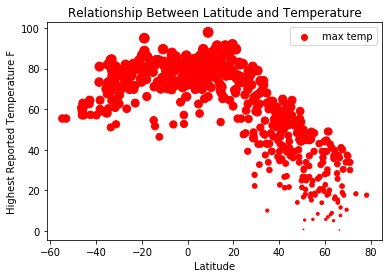

In [70]:
#Build the scatter plots Latitude vs Temperature Plout
#Build the scatter plots for each city types

# Incorporate the other graph properties
#Urban scatterplot
#plt.scatter(Urban["rides per city"], Urban["Average fare"], color="Gold", edgecolors="black", s=Urban["Drivers per city"]*20, label = "Urban")
# Incorporate the other graph properties
#Lat vs temp scatterplot
plt.scatter(weather_data["lat"],weather_data["max temp"],s=weather_data["max temp"], color="red")
plt.show
#Create a title, x label, and y label for our chart
plt.title("Relationship Between Latitude and Temperature")
plt.xlabel("Latitude")
plt.ylabel("Highest Reported Temperature F")

#add legend
plt.legend(loc="best")

plt.savefig("..//LatTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

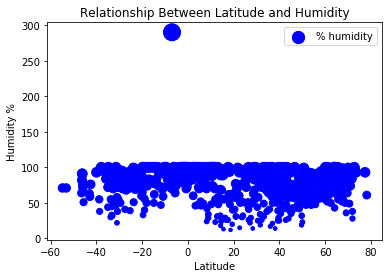

In [77]:
#Build the scatter plots Latitude vs Temperature Plout
#Build the scatter plots for each city types

# Incorporate the other graph properties
#Urban scatterplot
#plt.scatter(Urban["rides per city"], Urban["Average fare"], color="Gold", edgecolors="black", s=Urban["Drivers per city"]*20, label = "Urban")
# Incorporate the other graph properties
#Lat vs temp scatterplot
plt.scatter(weather_data["lat"],weather_data["% humidity"],s=weather_data["% humidity"], color="Blue")
plt.show
#Create a title, x label, and y label for our chart
plt.title("Relationship Between Latitude and Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

#add legend
plt.legend(loc="best")

plt.savefig("..//LatHumid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

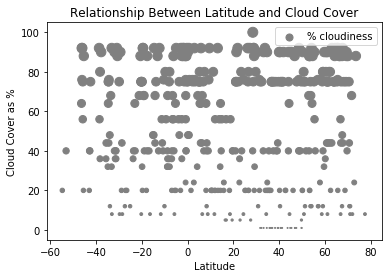

In [78]:
#Build the scatter plots Latitude vs Temperature Plout
#Build the scatter plots for each city types

# Incorporate the other graph properties
#Urban scatterplot
#plt.scatter(Urban["rides per city"], Urban["Average fare"], color="Gold", edgecolors="black", s=Urban["Drivers per city"]*20, label = "Urban")
# Incorporate the other graph properties
#Lat vs temp scatterplot
plt.scatter(weather_data["lat"],weather_data["% cloudiness"],s=weather_data["% cloudiness"], color="gray")
plt.show
#Create a title, x label, and y label for our chart
plt.title("Relationship Between Latitude and Cloud Cover")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover as %")

#add legend
plt.legend(loc="best")

plt.savefig("..//LatCloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

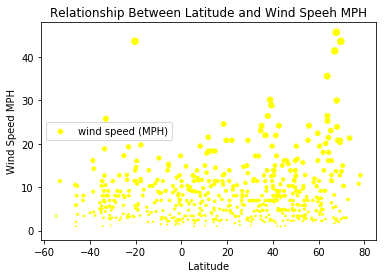

In [79]:
#Build the scatter plots Latitude vs Temperature Plout
#Build the scatter plots for each city types

# Incorporate the other graph properties
#Urban scatterplot
#plt.scatter(Urban["rides per city"], Urban["Average fare"], color="Gold", edgecolors="black", s=Urban["Drivers per city"]*20, label = "Urban")
# Incorporate the other graph properties
#Lat vs temp scatterplot
plt.scatter(weather_data["lat"],weather_data["wind speed (MPH)"],s=weather_data["wind speed (MPH)"], color="yellow")
plt.show
#Create a title, x label, and y label for our chart
plt.title("Relationship Between Latitude and Wind Speeh MPH")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed MPH")

#add legend
plt.legend(loc="best")

plt.savefig("..//LatWindSpd.png")
plt.show()